In [1]:
# Import najważniejszych bibliotek

import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.regularizers import l2, l1
from tensorflow.keras import layers
from tensorflow.keras import activations

%matplotlib inline
import matplotlib.pyplot as plt
#from tensorflow import keras

### Tensory
Tensor - to podstawowa struktura danych w bibliotekach do Deep Learning.

Tensory możemy stworzyć na parę różnych sposobów.
1. Z list
2. Z tablic numpy
3. Zera, jedynki lub randomowe

In [26]:
rank_0_tensor = tf.constant(4)
rank_1_tensor = tf.constant([4, 5])
rank_2_tensor = tf.constant([[4, 5], [10, 2]])
rank_3_tensor = tf.constant([[[1, 2], [3, 4]],
                             [[5, 6], [7, 8]],
                             [[9, 10], [11, 12]]])
print(rank_0_tensor)
print(rank_1_tensor)
print(rank_2_tensor)
print(rank_3_tensor)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([4 5], shape=(2,), dtype=int32)
tf.Tensor(
[[ 4  5]
 [10  2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]], shape=(3, 2, 2), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor([4 5], shape=(2,), dtype=int32)
tf.Tensor(
[[ 4  5]
 [10  2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]], shape=(3, 2, 2), dtype=int32)


In [27]:
# Z arrayu numpy
array = np.random.uniform(0, 1, size=20)
tensor = tf.convert_to_tensor(array)
print(tensor)

tf.Tensor(
[0.49610687 0.83338463 0.83768262 0.19373408 0.38551199 0.95569596
 0.56857406 0.88394129 0.24915033 0.92581957 0.30232749 0.23067563
 0.53229588 0.24158225 0.94759027 0.29976331 0.23244331 0.99607491
 0.82217818 0.82620649], shape=(20,), dtype=float64)
tf.Tensor(
[0.49610687 0.83338463 0.83768262 0.19373408 0.38551199 0.95569596
 0.56857406 0.88394129 0.24915033 0.92581957 0.30232749 0.23067563
 0.53229588 0.24158225 0.94759027 0.29976331 0.23244331 0.99607491
 0.82217818 0.82620649], shape=(20,), dtype=float64)


In [28]:
# Randomowy
uniform_tensor = tf.random.uniform((1, 2), minval=0, maxval=100, seed=42)
normal_tensor = tf.random.normal((1, 2), mean=10, stddev=5, seed=42)

print(uniform_tensor)
print(normal_tensor)

tf.Tensor([[70.954346 41.16069 ]], shape=(1, 2), dtype=float32)
tf.Tensor([[12.184006  6.480512]], shape=(1, 2), dtype=float32)
tf.Tensor([[70.954346 41.16069 ]], shape=(1, 2), dtype=float32)
tf.Tensor([[12.184006  6.480512]], shape=(1, 2), dtype=float32)


In [29]:
### Zera lub jedynki
tensor_ones = tf.ones((2, 4))
tensor_zeros = tf.zeros((3, 2))

### Operacje na Tensorach

#### Slicing i indeksacja

In [30]:
tensor = tf.random.uniform((3, 4))
print(tensor[1])
print(tensor[:, -1])
print(tensor[-1, -1])
print(tensor)

tf.Tensor([0.4959936  0.05569887 0.5830203  0.13878286], shape=(4,), dtype=float32)
tf.Tensor([0.92439234 0.13878286 0.10024488], shape=(3,), dtype=float32)
tf.Tensor(0.10024488, shape=(), dtype=float32)
tf.Tensor(
[[0.32074833 0.75077474 0.09514058 0.92439234]
 [0.4959936  0.05569887 0.5830203  0.13878286]
 [0.6311047  0.43532062 0.05023301 0.10024488]], shape=(3, 4), dtype=float32)
tf.Tensor([0.4959936  0.05569887 0.5830203  0.13878286], shape=(4,), dtype=float32)
tf.Tensor([0.92439234 0.13878286 0.10024488], shape=(3,), dtype=float32)
tf.Tensor(0.10024488, shape=(), dtype=float32)
tf.Tensor(
[[0.32074833 0.75077474 0.09514058 0.92439234]
 [0.4959936  0.05569887 0.5830203  0.13878286]
 [0.6311047  0.43532062 0.05023301 0.10024488]], shape=(3, 4), dtype=float32)


#### Transponowanie

In [31]:
tensor = tf.zeros((3, 4))
print(tensor)
print(tf.transpose(tensor))

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(4, 3), dtype=float32)


#### "Rozszerzanie" o wymiar

In [32]:
tensor_to_squeeze = tf.constant([[1] for i in range(10)])
print(tensor_to_squeeze.shape)
print(tf.squeeze(tensor_to_squeeze).shape)

print(tf.expand_dims(tensor_to_squeeze, axis=1).shape)
print(tf.expand_dims(tensor_to_squeeze, axis=0).shape)

(10, 1)
(10,)
(10, 1, 1)
(1, 10, 1)
(10, 1)
(10,)
(10, 1, 1)
(1, 10, 1)


#### Operacje arytmetyczne

In [33]:
print(tensor_to_squeeze)
print(tensor_to_squeeze * 2 + 5)

tf.Tensor(
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]], shape=(10, 1), dtype=int32)
tf.Tensor(
[[7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]], shape=(10, 1), dtype=int32)
tf.Tensor(
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]], shape=(10, 1), dtype=int32)
tf.Tensor(
[[7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]
 [7]], shape=(10, 1), dtype=int32)


#### Operacje macierzowe

In [34]:
tensor = tf.ones((4, 3), dtype=tf.dtypes.float32)
tensor2 = tf.random.uniform((3, 4))

print(tensor)
print(tensor2)

result = tf.linalg.matmul(tensor, tensor2)
print(result)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[0.5652069  0.8338641  0.98081875 0.8061272 ]
 [0.75263023 0.77265406 0.33096063 0.60722864]
 [0.15195608 0.85065436 0.41770875 0.95248735]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[1.4697932 2.4571724 1.7294881 2.3658433]
 [1.4697932 2.4571724 1.7294881 2.3658433]
 [1.4697932 2.4571724 1.7294881 2.3658433]
 [1.4697932 2.4571724 1.7294881 2.3658433]], shape=(4, 4), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(4, 3), dtype=float32)
tf.Tensor(
[[0.5652069  0.8338641  0.98081875 0.8061272 ]
 [0.75263023 0.77265406 0.33096063 0.60722864]
 [0.15195608 0.85065436 0.41770875 0.95248735]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[1.4697932 2.4571724 1.7294881 2.3658433]
 [1.4697932 2.4571724 1.7294881 2.3658433]
 [1.4697932 2.4571724 1.7294881 2.3658433]
 [1.4697932 2.4571724 1.7294881 2.3658433]], shape=(4, 4), dtype=float32)


### API Warstw
W Keras podstawowym blokiem do budowania modeli są warstwy. W postaci warstw są wyrażone:
- Warstwy neuronów (Fully connected)
- Funkcje aktywacji
- Regularyzacje (Dropout)
- Batch Normalization

#### Przykład warstwy

In [35]:
input = tf.random.uniform((3, 4))
print(input)
hidden = tf.keras.layers.Dense(4)
print(hidden)
after_hidden = hidden(input)
print(after_hidden)

tf.Tensor(
[[0.08174777 0.19891763 0.1960665  0.88195324]
 [0.13915241 0.5791135  0.4055673  0.6633321 ]
 [0.94831    0.1239351  0.7476082  0.9628035 ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[-0.14825447  0.8385049   0.08088262 -0.08412699]
 [-0.35607618  0.92534006  0.54157305  0.09185492]
 [-0.07447417  0.22362757  0.508025   -0.43238568]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[0.08174777 0.19891763 0.1960665  0.88195324]
 [0.13915241 0.5791135  0.4055673  0.6633321 ]
 [0.94831    0.1239351  0.7476082  0.9628035 ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[-0.14825447  0.8385049   0.08088262 -0.08412699]
 [-0.35607618  0.92534006  0.54157305  0.09185492]
 [-0.07447417  0.22362757  0.508025   -0.43238568]], shape=(3, 4), dtype=float32)


### Funkcja aktywacji

In [36]:
### Sigmoid
preds = tf.constant([0.2, 0.35, 0.45], dtype=tf.float32)
preds = tf.expand_dims(preds, axis=0)
tf.keras.activations.softmax(preds).numpy()

array([[0.29020336, 0.3371682 , 0.37262848]], dtype=float32)

array([[0.29020336, 0.3371682 , 0.37262848]], dtype=float32)

In [37]:
### ReLU
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
tf.keras.activations.relu(foo).numpy()

array([ 0.,  0.,  0.,  5., 10.], dtype=float32)

array([ 0.,  0.,  0.,  5., 10.], dtype=float32)

# Zaczynamy tworzenie modelu

In [38]:
# Ładujemy dataset
df = tf.keras.datasets.fashion_mnist.load_data()

## *tf.keras.datasets.fashion_mnist.load_data()*:

- Zwraca nam krotkę Numpy array (x_train, y_train), (x_test, y_test)
- Niestandardowe dla nas dane (dotychczas operowaliśmy na DataFrame'ach)

#### Ładowanie zbioru danych

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

print(f"x_train type: {type(x_train)}")
print(f"x_train shape: {x_train.shape}")

print(f"y_train type: {type(y_train)}")
print(f"y_train shape: {y_train.shape}")

print(f"x_train type: {type(x_test)}")
print(f"x_train shape: {x_test.shape}")

print(f"y_train type: {type(y_test)}")
print(f"y_test shape: {y_test.shape}")

x_train type: <class 'numpy.ndarray'>
x_train shape: (60000, 28, 28)
y_train type: <class 'numpy.ndarray'>
y_train shape: (60000,)
x_train type: <class 'numpy.ndarray'>
x_train shape: (10000, 28, 28)
y_train type: <class 'numpy.ndarray'>
y_test shape: (10000,)
x_train type: <class 'numpy.ndarray'>
x_train shape: (60000, 28, 28)
y_train type: <class 'numpy.ndarray'>
y_train shape: (60000,)
x_train type: <class 'numpy.ndarray'>
x_train shape: (10000, 28, 28)
y_train type: <class 'numpy.ndarray'>
y_test shape: (10000,)


In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Udało się wczytać i podzielić zbiór danych Fashion MNIST na zbiór trenujący i testowy.
Widać też od razu jaka jest wymiarowość zbioru.
Łącznie mamy 70000 obrazów do dyspozycji.

### **Co siedzi w pojedyńczym obrazku**

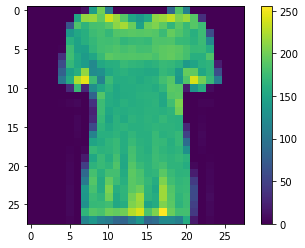

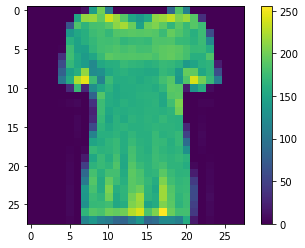

In [41]:
plt.figure()
plt.imshow(x_train[10]) # wybieramy jakikolwiek obrazek
plt.colorbar()
plt.grid(False)
plt.show()

Widzimy, że nasze obrazki przyjmują wartości od 0 do 255 dla kolorów.
Ponieważ chcemy zbudować model do klasyfikacji obrazków potrzebujemy znormalizować zbiór. W tym celu każdy obrazek będzie mieć znormalizowaną paletę kolorów do (0, 1) z (0, 255)

In [42]:
x_train = x_train / 255.0
x_test = x_test / 255.0

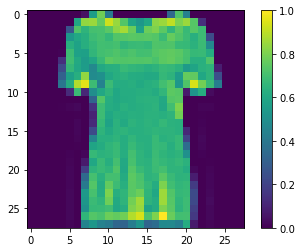

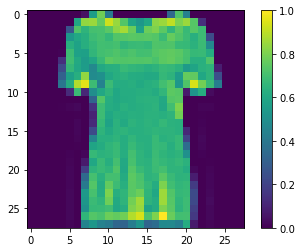

In [43]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

Wygląda jakby nasza operacja normalizacji nie zadziała, patrząc po samej kolorystyce obrazka. Zwróćmy uwagę na skalę, jednak poprawnie znormalizowaliśmy zbiór :)

### **Inicjalizacja modelu i budowanie warstw**

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'), #, 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)          

### **Funkcje straty**
- binary cross entropy
- mse
...

In [46]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

#**Optimizers**
- Adam
- SGD
- RMSprop

In [47]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
optimizer = SGD(learning_rate = 0.01)

### **Metryki**
- accuracy
- precision
- recall

In [48]:
metrics = ['accuracy']

In [49]:
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = metrics)

In [50]:
history = model.fit(x_train,
                    y_train,
                    batch_size = 128,
                    epochs = 10)

Epoch 1/10
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.0592 - accuracy: 0.6778
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.7799
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5988 - accuracy: 0.8043
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.8159
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.8237
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.8237
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5070 - accuracy: 0.8287
Epoch 7/10Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4916 - accuracy: 0.8325
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4916 - accuracy: 0.8325
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.479

In [51]:
history.history['accuracy']

[0.6777833104133606,
 0.7799000144004822,
 0.8043000102043152,
 0.815850019454956,
 0.8237166404724121,
 0.8287000060081482,
 0.8325333595275879,
 0.8364999890327454,
 0.8394500017166138,
 0.8422999978065491]

[0.6777833104133606,
 0.7799000144004822,
 0.8043000102043152,
 0.815850019454956,
 0.8237166404724121,
 0.8287000060081482,
 0.8325333595275879,
 0.8364999890327454,
 0.8394500017166138,
 0.8422999978065491]

In [52]:
history.history['loss']

[1.0591870546340942,
 0.6802636981010437,
 0.598789393901825,
 0.5550712943077087,
 0.5267965793609619,
 0.5069580078125,
 0.491639107465744,
 0.47919660806655884,
 0.46932634711265564,
 0.460294634103775]

[1.0591870546340942,
 0.6802636981010437,
 0.598789393901825,
 0.5550712943077087,
 0.5267965793609619,
 0.5069580078125,
 0.491639107465744,
 0.47919660806655884,
 0.46932634711265564,
 0.460294634103775]

In [53]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f'\nTest accuracy: {round(100 * test_acc, 2)}')

313/313 - 0s - loss: 0.4902 - accuracy: 0.8294 - 421ms/epoch - 1ms/step
313/313 - 0s - loss: 0.4902 - accuracy: 0.8294 - 421ms/epoch - 1ms/step

Test accuracy: 82.94

Test accuracy: 82.94


In [54]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [55]:
model_output = model.predict(x_test)

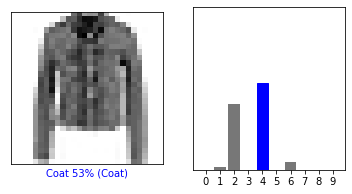

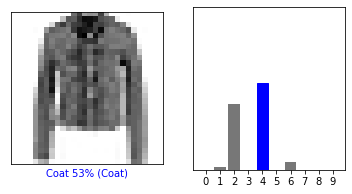

In [56]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, model_output[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, model_output[i],  y_test)
plt.show()

### Spróbujmy zrobić to lepiej

Planowane ulepszenia:
- Większy model
- Dłuższe trenowanie
- Bardziej zaawansowany optymalizator
- Regularyzacje
- Dropout
- Batch Norm

In [57]:
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


In [58]:
# Split datasets
old_train_x, old_train_y = x_train, x_train

train_x, val_x, train_y, val_y = train_test_split(x_train, x_train, test_size=0.2, random_state=42)
len(train_x)

48000

48000

In [59]:
# kernel_regularizer = None
# bias_regularizer = None
kernel_regularizer = regularizers.l2(1e-5)
bias_regularizer = regularizers.l2(1e-5)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu',
                          kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer)
])

In [60]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)
metrics = ['accuracy']

### **Wszystko w jednej funkcji**

In [61]:
def train_function(model, x_train, y_train, loss, optimizer, metrics=['accuracy'], batch_size=128, epochs=10):
    
    train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    
    model.compile(
        loss=loss,
        optimizer=optimizer,
        metrics=metrics
    )
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=False
    )

    history = model.fit(
        train_x,
        train_y,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early_stopping],
        validation_data=(val_x, val_y)
    )

    return model, history.epoch, history.history

In [ ]:
### Training here
history = train_function(model, x_train, y_train, loss, optimizer, batch_size=128, epochs=100)

Epoch 1/100
Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.8076

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f'\nTest accuracy: {round(100 * test_acc, 2)}')

## Zadanie end-end realizowane przez was!

Będziecie operować na datasecie CIFAR-10.

### Ładowanie danych

### Preprocessing danych
- Skalowanie



### Split na train, val, test

### Definicja modelu
- Różne funkcje aktywacji
- SGD vs. Adam
- Baseline model vs. Advanced model


### Create training utilities
- Callback
- Optimizer (probably in model definition)
- Loss (metric) function (probably in model definition)
- Regularyzacja
- Batch Normalization
- Dropout

### Trenowanie modelu

### Ewaluacja